<a href="https://colab.research.google.com/github/bdm-unlu/2021/blob/main/guias/Arbol_Atributos_Categoricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión en Scikit Learn para _atributos categóricos_

## Introducción
Uno de los problemas a los que nos encontramos cuando empezamos a trabajar con  _árboles de clasificación_ en Scikit Learn es que la clase __DecisionTreeClassifier__ no soporta atributos categóricos como input para la generación del árbol de clasificación.


In [1]:
!wget https://raw.githubusercontent.com/bdm-unlu/2021/master/TPs/TP05/TP0501/zoo.csv

# Importamos la librería pandas (tipo de dato dataframe)
import pandas as pd 

# Lee el archivo
data = pd.read_csv("zoo.csv") 
# Preview the first 5 lines of the loaded data 
data.head()


--2021-10-21 13:11:21--  https://raw.githubusercontent.com/bdm-unlu/2021/master/TPs/TP05/TP0501/zoo.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10171 (9.9K) [text/plain]
Saving to: ‘zoo.csv’

zoo.csv             100%[===================>]   9.93K  --.-KB/s    in 0s      

2021-10-21 13:11:21 (60.4 MB/s) - ‘zoo.csv’ saved [10171/10171]



,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


Por ello, deberemos numerizar nuestros atributos con el método _LabelEncoder_. Para ello recorremos las diferentes columnas del dataset cautelando que las mismas sean de tipo object (texto) y no sean la clase o varialbe objetivo del dataset.
<br /> <br />
En este caso, la variable objetivo, para la cual Scikit Learn si soporta atributos discretos, es el atributo _type_.

In [2]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for column_name in data.columns:
  if (data[column_name].dtype == object) & (column_name!='type'):
    data[column_name] = le.fit_transform(data[column_name])

data.head()

,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [3]:

# Separo "a mano" festures de target

# Features
feature_names = list(data.columns)
# Elimino type porque es la clase
feature_names.remove('type')
x = data[feature_names]

# Target
y = data.type
le.fit(data['type'])
target_names=le.classes_




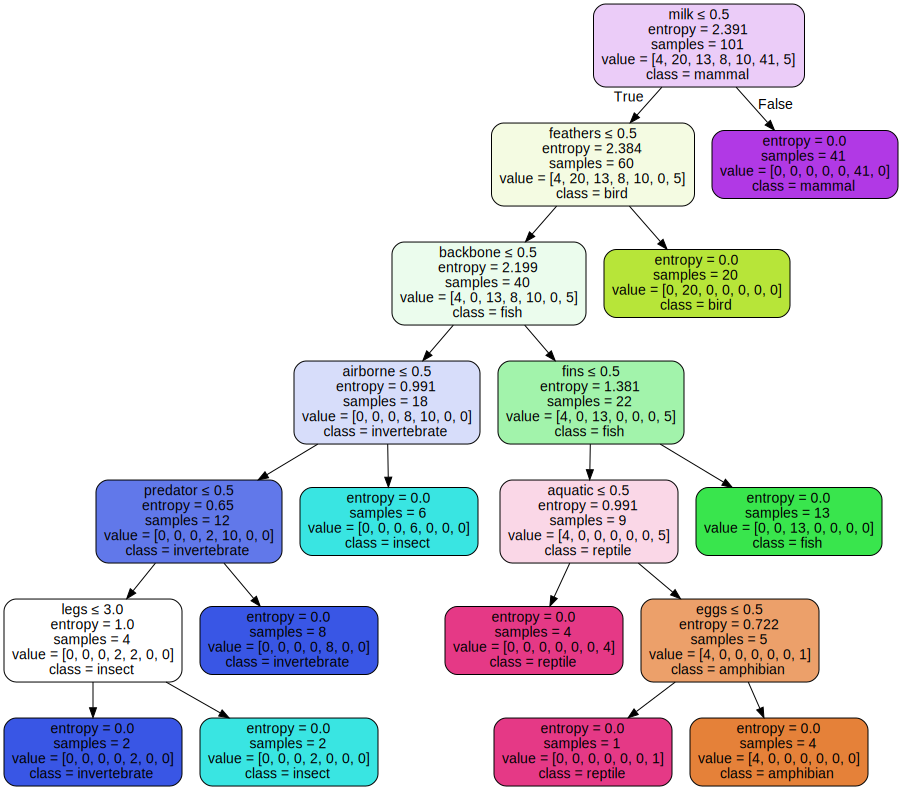

In [4]:
from sklearn import tree

arbol = tree.DecisionTreeClassifier(criterion='entropy')

arbol = arbol.fit(x, y)

#Importamos la librería
import graphviz

dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names=target_names,
                                label='all',
                                filled=True, rounded=True,
                                special_characters=True)  

# Capturo el source
graph = graphviz.Source(dot_data)

# Muestro el contenido de graph
graph
